### <div align="center">Supervised Machine Learning - Classification</div>

##### 4.1: Introduction to Classification
- Regression Models work with continuous values that can take on any value, while Classification is categorical and sticks to a definite set of values.
- The Classification Model can be split into two types:
  1. Binary Classification
  2. Multi class Classification

##### 4.2: Logistic Regression: Binary Classification
- The Sigmoid Function converts input a range from 0 to 1.
- sigmoid(z)=1/(1+e^−z) , e = Euler’s number - 2.71828
- It is a crucial function in logistic regression for binary classification as it maps linear outputs to probabilities, helping to improve the model’s predictions.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/car_ownership.csv")
df.head(3)

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1


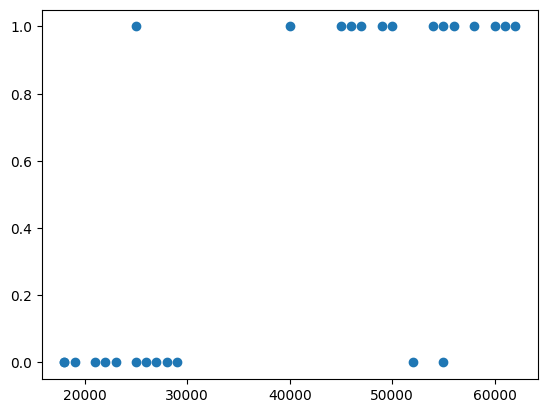

In [6]:
plt.scatter(df.monthly_salary, df.owns_car)
plt.show()

In [17]:
# Separate the features and the target variable
X = df[['monthly_salary']]
y = df['owns_car']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8888888888888888

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [10]:
y_test.tolist()

[1, 0, 1, 0, 0, 0, 1, 1, 0]

In [11]:
X_test

,monthly_salary
8,62000
13,29000
9,61000
21,26000
0,22000
11,28000
16,25000
17,58000
12,27000


In [12]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [13]:
model.predict_proba(X_test)

array([[0.04530932, 0.95469068],
       [0.80955349, 0.19044651],
       [0.05158003, 0.94841997],
       [0.86480041, 0.13519959],
       [0.91687254, 0.08312746],
       [0.82967465, 0.17032535],
       [0.87995016, 0.12004984],
       [0.07564619, 0.92435381],
       [0.84806892, 0.15193108]])

In [14]:
model.coef_, model.intercept_

(array([[0.00013621]]), array([-5.39725076]))

In [15]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(salary, model):
    z = model.coef_ * salary + model.intercept_
    y = sigmoid(z[0][0])
    return y

prediction_function(62000, model)

0.954690678813166

In [16]:
prediction_function(29000, model)

0.1904465115158154

##### 4.3: Model Evaluation - Accuracy, Precision and Recall
- We have two category for classification
  - Truth (Actual Value)
  - Prediction (Predicted Value)
- `Accuracy` is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
  - Accuracy = (True Positives + True Negatives) / (Total Cases)
  - While accuracy can be a useful metric, it might not always provide a comprehensive view of a model's performance. Therefore, we also consider other measures like precision and recall to ensure a more rounded evaluation.
- `Precision` is the ratio of true positive predictions to the total predicted positives, measuring the accuracy of the positive predictions.
  - Precision = (True Positives) / (True Positives + False Positive)
  - Out of all dog predictions how many are correct (Basically we reference prediction as base).
- `Recall` is the ratio of true positive predictions to the actual positives, assessing the model’s ability to identify all relevant cases.
  - Recall = (True Positives) / (True Positive + False Negative)
  - Out of all dogs in the truth, how many did we predict correctly (Basically we reference truth as base).

In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



##### 4.6: Model Evaluation - F1 Score, Confusion Matrix
- The F1 score is the harmonic mean of the precision and recall.
- F1 Score = 2 × (Precision×Recall / Precision + Recall)
- A confusion matrix is a table layout that visualizes the performance of a classification algorithm by displaying the true and false predictions it makes.


In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5, 0],
       [1, 3]], dtype=int64)

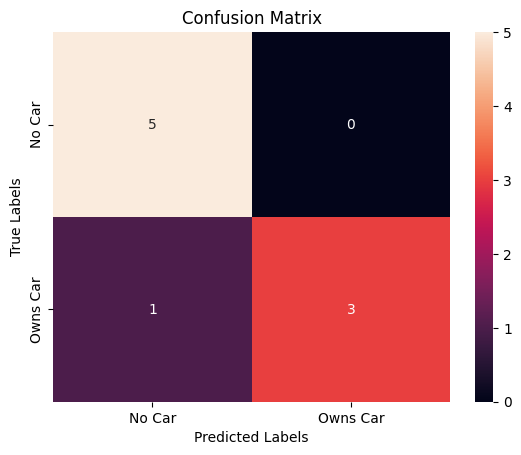

In [21]:
import seaborn as sns

classes = ["No Car", "Owns Car"]

sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes)   
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### 4.11: Support Vector Machine (SVM)
- Support Vector Machine (SVM) is a robust supervised learning model that finds the optimal hyperplane in an n-dimensional space for classification and regression tasks.
- A Kernel is a function that transforms data into a higher dimensional space so that a decision boundary can be drawn. There are different kernels available for different use cases, some examples - poly, linear, rbf, sigmoid.
- Gamma (γ): This is a parameter in SVM that decides the impact of each data point on the decision boundary. It is about how closely the model adheres to the data.
- Regularization: In machine learning, regularization adds a complexity penalty to the model to curb over fitting and enhance its performance on new data.
- Choosing the appropriate kernel significantly influences the total computational power. This, in turn, affects the budget of the entire project.

##### 4.12: Data Pre-processing: Scaling
- Scaling in machine learning involves adjusting the range of feature values to a common scale, such as 0 to 1, enhancing model performance by ensuring each feature contributes equally.
  - Min-Max Scaling
  - Standard Scaling (Z-score normalization)

##### 4.13: Sklearn Pipeline
- Sklearn offers a handy and robust tool known as a pipeline. This feature lets you build and operate a series of data transformation and modeling tasks as one entity.
- This tool is instrumental in simplifying machine learning workflows, safeguarding uniformity in data processing, and enhancing the efficacy of model creation and evaluation.

##### 4.17: Naive Bayes Classification Theory
- P(A | B) = Probability of event A knowing that event B has already occurred.
- Bayes’ Theorem: P(A | B) = P(B | A) * P(A) / P(B)
- It's called Naive Bayes because it makes the naive assumption that all features (such as p(free) or p(lottery)) are independent of each other.
##### 4.18: Naive Bayes: SMS Spam Classification
- Machine learning models process numbers, not text. Hence, during preprocessing, it is crucial to convert text-based datasets into numerical form for model training.
- The Count Vectorizer transforms a collection of text documents into a matrix of token counts. It essentially reflects the frequency of each word within the documents. Sklearn offers a built-in API for this operation.
- For the Naive Bayes implementation, we opted for MultinomialNB. It is apt for situations where features are word frequencies in a text, making it a popular choice for text classification.

##### 4.21: Decision Tree Theory
- In machine learning, a decision tree is a type of supervised learning algorithm. It models decisions and their potential outcomes in a structure resembling a tree, composed of various choices.
- You can select the higher-level nodes using either of the following typical methods.
  - Gini Impurity (Check formula)
  - Entropy (Information Gain)

### Breast cancer recurrence prediction use case

You are a data scientist / AI engineer working on a breast cancer recurrence prediction project. You have been provided with a dataset named **`"breast_cancer_data.csv"`**, which includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).

Your task is to analyze this dataset to understand the factors contributing to breast cancer recurrence. You will handle class imbalance using various techniques and build machine learning models to predict whether a patient will experience recurrence events based on the provided features.

In [3]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [4]:
# Step 1: Import the dataset and display the first few rows
df = pd.read_csv("../data/breast_cancer_data.csv")
print("Number of rows and columns: ", df.shape)
print("First few rows of the dataset:")
df.head()

Number of rows and columns:  (286, 10)
First few rows of the dataset:


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [5]:
# Step 2: Check for any missing values in the dataset and handle them appropriately
print("Missing values in the dataset:")
print(df.isna().sum())

Missing values in the dataset:
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64


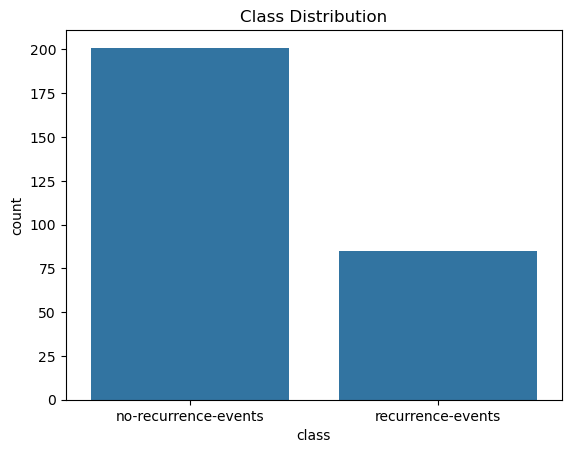

In [6]:
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [7]:
# Step 4: Encoding categorical variables using one-hot encoding for the following columns:
# age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat.
df = pd.get_dummies(df, columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)
print("First few rows of the encoded dataset:")
df.head()

First few rows of the encoded dataset:


,deg-malig,class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_09-May,...,inv-nodes_14-Dec,inv-nodes_15-17,inv-nodes_24-26,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,no-recurrence-events,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,2,no-recurrence-events,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


### Logistic Regression Model Without Handling Class Imbalance
1. Split the dataset into training and test sets.
2. Train a Logistic Regression model using the training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [19]:
# Step 1: Split the dataset into training and test sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Train a Logistic Regression model using the training data
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report Without Handling Class Imbalance:")
print(report)

Classification Report Without Handling Class Imbalance:
                      precision    recall  f1-score   support

no-recurrence-events       0.75      0.88      0.81        41
   recurrence-events       0.50      0.29      0.37        17

            accuracy                           0.71        58
           macro avg       0.62      0.59      0.59        58
        weighted avg       0.68      0.71      0.68        58



### Handling Class Imbalance Using Undersampling
1. Apply undersampling to balance the classes in the training data.
2. Train a Logistic Regression model using the undersampled training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [18]:
# Step 1: Apply undersampling to balance the classes in the training data
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the undersampled training data
model_rus = LogisticRegression(max_iter=2000)
model_rus.fit(X_train_rus, y_train_rus)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_rus = model_rus.predict(X_test)
report_rus = classification_report(y_test, y_pred_rus)
print("Classification Report with Undersampling:")
print(report_rus)

Classification Report with Undersampling:
                      precision    recall  f1-score   support

no-recurrence-events       0.81      0.54      0.65        41
   recurrence-events       0.39      0.71      0.50        17

            accuracy                           0.59        58
           macro avg       0.60      0.62      0.57        58
        weighted avg       0.69      0.59      0.60        58



### Handling Class Imbalance Using SMOTE (Oversampling)
1. Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [16]:
# Step 1: Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the SMOTE-balanced training data
model_smote = LogisticRegression(max_iter=200)
model_smote.fit(X_train_smote, y_train_smote)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_smote = model_smote.predict(X_test)
report_smote = classification_report(y_test, y_pred_smote)
print("Classification Report with SMOTE:")
print(report_smote)

Classification Report with SMOTE:
                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58



### Handling Class Imbalance Using SMOTE Tomek Links
1. Apply SMOTE Tomek Links to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [17]:
# Step 1: Apply SMOTE Tomek Links to balance the classes in the training data
smt = SMOTETomek(random_state=42)
X_tomek, y_tomek = smt.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data
model_tomek = LogisticRegression(max_iter=2000)
model_tomek.fit(X_tomek, y_tomek)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_tomek = model_tomek.predict(X_test)
report_tomek = classification_report(y_test, y_pred_tomek)
print("Classification Report with SMOTE Tomek Links:")
print(report_tomek)

Classification Report with SMOTE Tomek Links:
                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58

